# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "5d2e2f177ca4a0a3f9a16782c4ade136f892ead0"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O rsi_macd_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/rsi_macd_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' rsi_macd_crossover.py

In [5]:
from rsi_macd_crossover_v2 import RSIMACDCrossoverV2 as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 135403,
 'strategyId': '551a08e21d104dd1907b21ffe1252281'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('HEROMOTOCO', exchange='NSE')
instrument

[{'id': 28, 'value': 'NSE:HEROMOTOCO'},
 {'id': 1672355, 'value': 'NSE:HEROMOTOCO.AF'},
 {'id': 1672479, 'value': 'NSE:HEROMOTOCO.BL'},
 {'id': 2316395, 'value': 'NSE:HEROMOTOCO.L1'},
 {'id': 2041177, 'value': 'NSE:HEROMOTOCO.R1'},
 {'id': 2041176, 'value': 'NSE:HEROMOTOCO.V1'},
 {'id': 24609, 'value': 'NSE:HEROMOTOCO20NOV2150CE'},
 {'id': 24610, 'value': 'NSE:HEROMOTOCO20NOV2150PE'},
 {'id': 24611, 'value': 'NSE:HEROMOTOCO20NOV2200CE'},
 {'id': 24612, 'value': 'NSE:HEROMOTOCO20NOV2200PE'}]

## Setup Parameters

In [9]:
parameters = {
    'OVERBOUGHT_VALUE': 85,
    'OVERSOLD_VALUE': 15,
    'TIMEPERIOD_FAST': 12,
    'TIMEPERIOD_RSI': 3,
    'TIMEPERIOD_SIGNAL': 9,
    'TIMEPERIOD_SLOW': 26
}

In [10]:
initial_virtual_funds = 1000000000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:HEROMOTOCO', 
    lots=2,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'RSI MACD Crossover V2' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ RSI MACD Crossover V2     │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NSE:HEROMOTOCO']        │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 2                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'OVERBOUGHT_VALUE': 85,  │
│                         │  'OVER

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (10)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

[2023-10-21 15:31:58] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-21 15:31:58] Sanity checks on cfg successful.
[2023-10-21 15:31:58] Currency set to "INR"
[2023-10-21 15:31:58] Setting up broker connection...
[2023-10-21 15:32:00] Broker connection has been setup successfully.
[2023-10-21 15:32:00] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2023-10-21 15:32:00] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-21 15:32:00] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-21 15:32:00] Reading strategy...
[2023-10-21 15:32:00] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                  NSE               HEROMOTOCO 2021-08-05 11:15:00+05:30   
1                  NSE               HEROMOTOCO 2021-08-06 12:15:00+05:30   
2                  NSE               HEROMOTOCO 2021-08-09 15:15:00+05:30   
3                  NSE               HEROMOTOCO 2021-08-13 09:15:00+05:30   
4                  NSE               HEROMOTOCO 2021-08-16 10:15:00+05:30   
5                  NSE               HEROMOTOCO 2021-08-17 15:15:00+05:30   
6                  NSE               HEROMOTOCO 2021-08-20 11:15:00+05:30   
7                  NSE               HEROMOTOCO 2021-08-24 14:15:00+05:30   
8                  NSE               HEROMOTOCO 2021-08-26 15:15:00+05:30   
9                  NSE               HEROMOTOCO 2021-09-02 10:15:00+05:30   
10                 NSE               HEROMOTOCO 2021-09-03 10:15:00+05:30   
11                 NSE               HEROMOTOCO 2021-09-07 11:15:00+05:30   
12                 NSE               HEROMOTOCO 2021-09-14 10:15:00+05:30   
13                 NSE               HEROMOTOCO 2021-09-17 14:15:00+05:30   
14                 NSE               HEROMOTOCO 2021-09-23 10:15:00+05:30   
15                 NSE               HEROMOTOCO 2021-09-24 11:15:00+05:30   
16                 NSE               HEROMOTOCO 2021-09-27 10:15:00+05:30   
17                 NSE               HEROMOTOCO 2021-09-29 11:15:00+05:30   
18                 NSE               HEROMOTOCO 2021-10-04 10:15:00+05:30   
19                 NSE               HEROMOTOCO 2021-10-06 11:15:00+05:30   
20                 NSE               HEROMOTOCO 2021-10-07 12:15:00+05:30   
21                 NSE               HEROMOTOCO 2021-10-14 10:15:00+05:30   
22                 NSE               HEROMOTOCO 2021-10-25 09:15:00+05:30   
23                 NSE               HEROMOTOCO 2021-10-26 11:15:00+05:30   
24                 NSE               HEROMOTOCO 2021-10-29 15:15:00+05:30   
25                 NSE               HEROMOTOCO 2021-11-03 13:15:00+05:30   
26                 NSE               HEROMOTOCO 2021-11-08 12:15:00+05:30   
27                 NSE               HEROMOTOCO 2021-11-11 11:15:00+05:30   
28                 NSE               HEROMOTOCO 2021-11-15 10:15:00+05:30   
29                 NSE               HEROMOTOCO 2021-11-18 10:15:00+05:30   
30                 NSE               HEROMOTOCO 2021-11-24 09:15:00+05:30   
31                 NSE               HEROMOTOCO 2021-11-25 12:15:00+05:30   
32                 NSE               HEROMOTOCO 2021-11-30 12:15:00+05:30   
33                 NSE               HEROMOTOCO 2021-12-06 14:15:00+05:30   
34                 NSE               HEROMOTOCO 2021-12-07 12:15:00+05:30   
35                 NSE               HEROMOTOCO 2021-12-13 12:15:00+05:30   
36                 NSE               HEROMOTOCO 2021-12-15 14:15:00+05:30   
37                 NSE               HEROMOTOCO 2021-12-21 14:15:00+05:30   
38                 NSE               HEROMOTOCO 2021-12-30 12:15:00+05:30   
39                 NSE               HEROMOTOCO 2021-12-31 10:15:00+05:30   
40                 NSE               HEROMOTOCO 2022-01-04 13:15:00+05:30   
41                 NSE               HEROMOTOCO 2022-01-05 12:15:00+05:30   
42                 NSE               HEROMOTOCO 2022-01-10 10:15:00+05:30   
43                 NSE               HEROMOTOCO 2022-01-12 09:15:00+05:30   
44                 NSE               HEROMOTOCO 2022-01-17 10:15:00+05:30   
45                 NSE               HEROMOTOCO 2022-01-19 09:15:00+05:30   
46                 NSE               HEROMOTOCO 2022-01-21 13:15:00+05:30   
47                 NSE               HEROMOTOCO 2022-01-25 13:15:00+05:30   
48                 NSE               HEROMOTOCO 2022-01-31 14:15:00+05:30   
49                 NSE               HEROMOTOCO 2022-02-02 14:15:00+05:30   
50                 NSE               HEROMOTOCO 2022-02-04 11:15:00+05:30   


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-05
End Period          2023-07-28
Risk-Free Rate      0.0%
Time in Market      88.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              0.69
Prob. Sharpe Ratio  72.44%
Sortino             0.88
Sortino/√2          0.62
Omega               1.16

Max Drawdown        -0.0%
Longest DD Days     615

Gain/Pain Ratio     0.16
Gain/Pain (1M)      0.47

Payoff Ratio        1.01
Profit Factor       1.16
Common Sense Ratio  1.51
CPC Index           0.63
Tail Ratio          1.31
Outlier Win Ratio   4.18
Outlier Loss Ratio  3.9

MTD                 -0.0%
3M                  0.0%
6M                  0.0%
YTD                 0.0%
1Y                  0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  172
Recovery Factor     0.5
Ulcer Index         0.0
Serenity Index      0.1


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-05
End Period                 2023-07-28
Risk-Free Rate             0.0%
Time in Market             88.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     0.69
Prob. Sharpe Ratio         72.44%
Smart Sharpe               0.68
Sortino                    0.88
Smart Sortino              0.86
Sortino/√2                 0.62
Smart Sortino/√2           0.61
Omega                      1.16

Max Drawdown               -0.0%
Longest DD Days            615
Volatility (ann.)          0.0%
Calmar                     0.25
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            7.31%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       7
Max Consecuti

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-09-29  2022-04-01  2023-06-07   615     -0.000075         -0.000070
2  2023-06-28  2023-07-13  2023-07-28    30     -0.000008         -0.000008
3  2021-09-17  2021-09-23  2021-09-27     9     -0.000006         -0.000006
4  2021-08-13  2021-08-13  2021-09-14    32     -0.000003         -0.000003

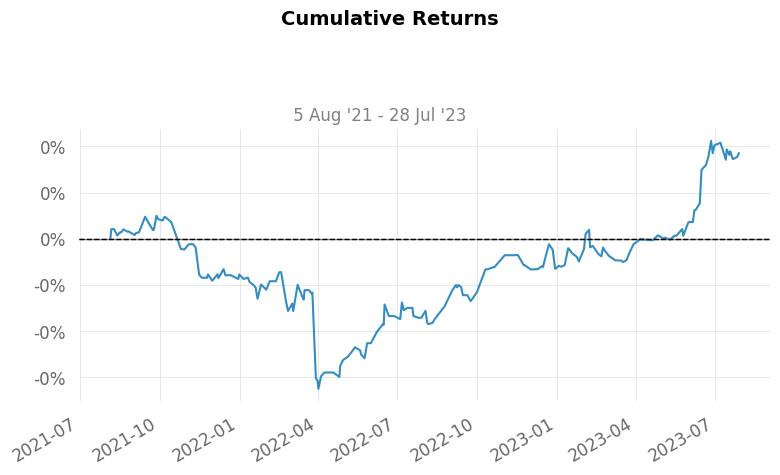

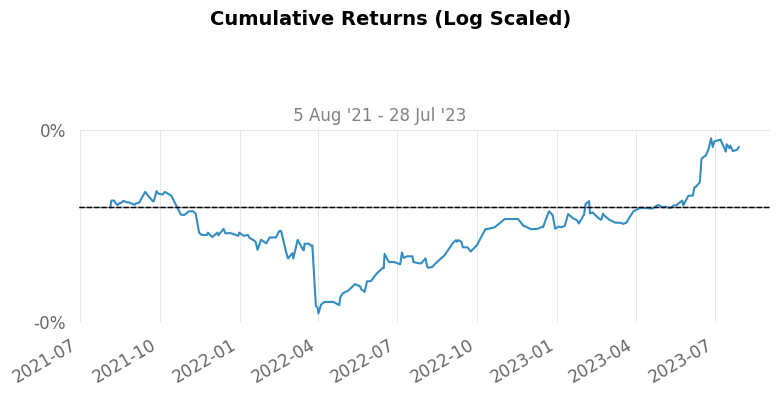

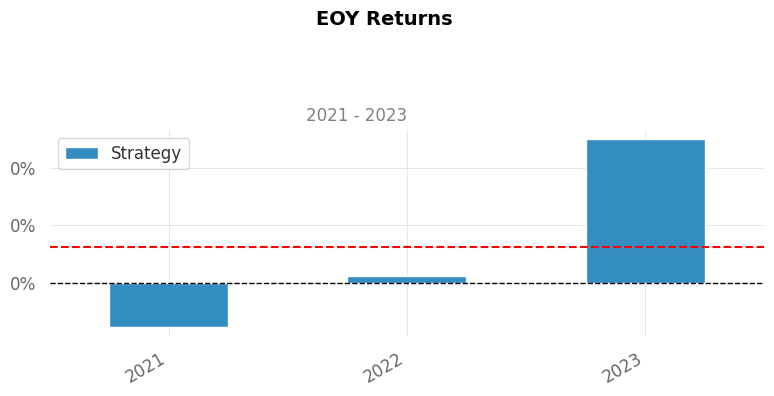

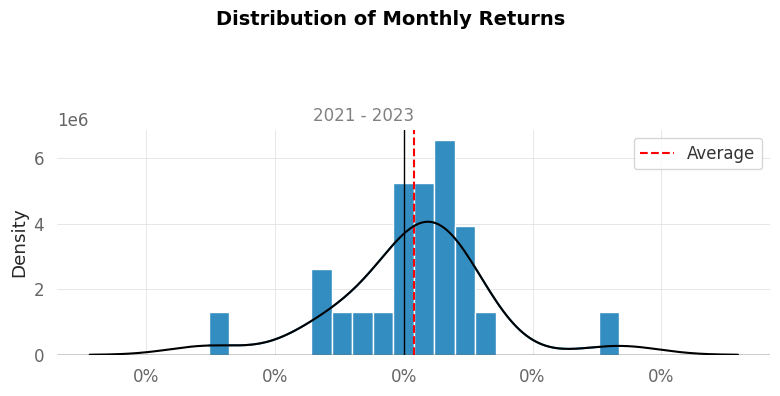

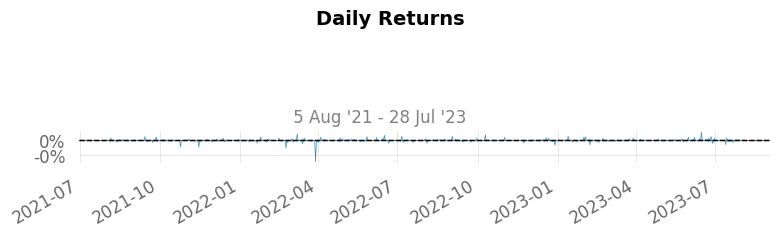

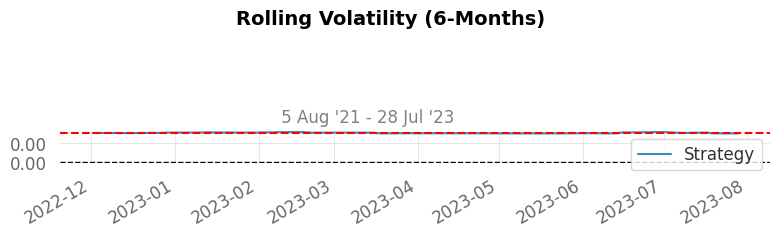

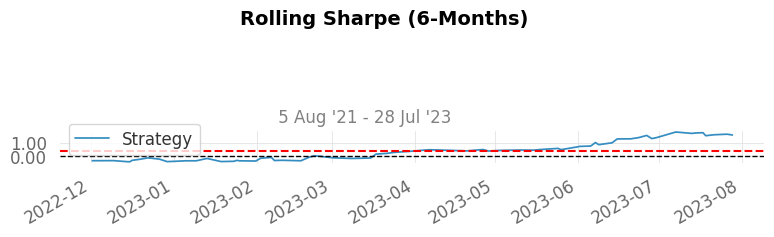

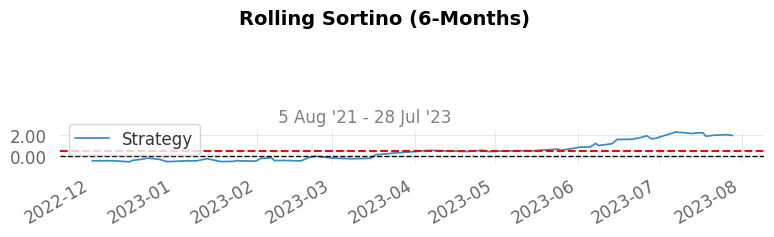

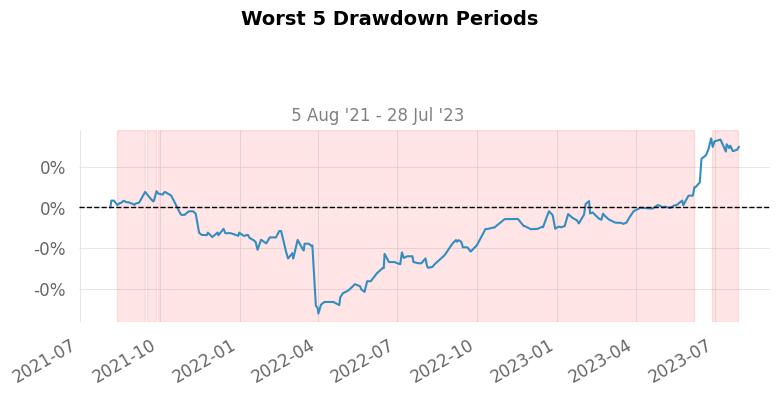

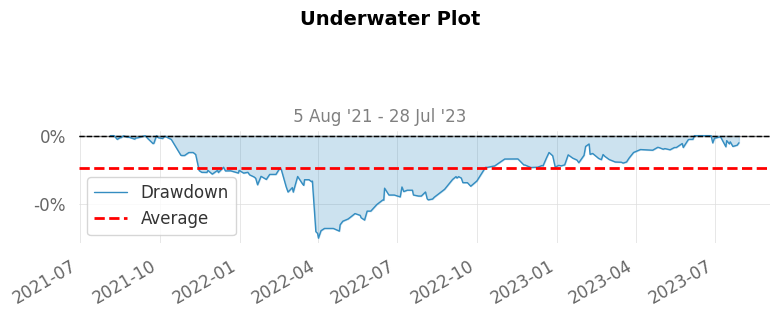

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


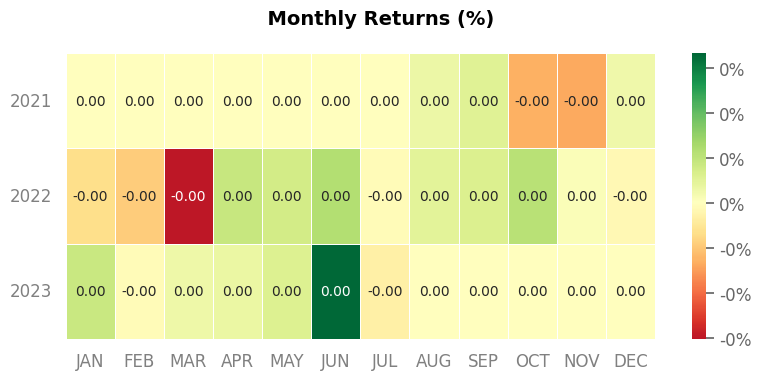

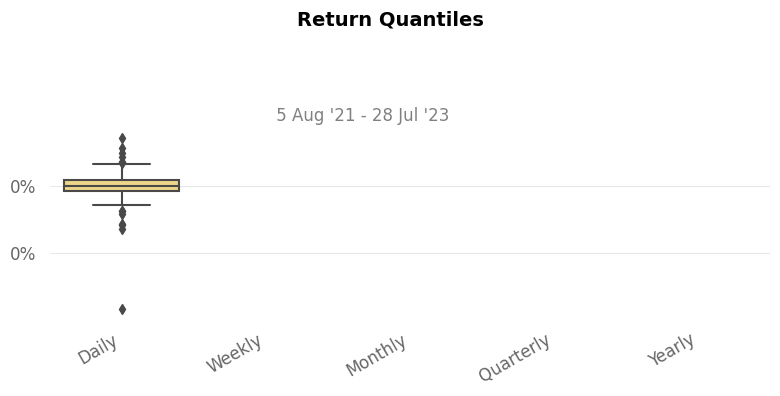

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 46058732266541ecbd2fcfd035268e0b |
| Transaction Type | SELL                             |
| Instrument       | NSE:HEROMOTOCO                   |
| Quantity         | 2                                |
| Price            | ₹3172.9                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-21T10:05:03.392401Z | COMPLETE               |
| 2023-10-21T10:05:03.392383Z | OPEN                   |
| 2023-10-21T10:05:03.392365Z | OPEN PENDING           |
| 2023-10-21T10:05:03.392344Z | VALIDATION PENDING     |
| 2023-10-21T10:05:03.392287Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | db15394a77ce420db

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:ADANIPOWER', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---